In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random
from random import randint

In [2]:
def Restaurant(Nombre_client, Accompagneur_max, Temps_ouverture, Table_disponible, cuisinier_disponible, performance) :
     
     Clients = [i+1 for i in range(Nombre_client)]
     df = pd.DataFrame({"Clients" : Clients})
     Instant_arrive = random.sample(range(Temps_ouverture), Nombre_client)

     Instant_arrive.sort()
     Instant_arrive[0] = 0

     Systeme_arrive = pd.DataFrame([df.iloc[i,:] for i in range(Nombre_client)])

     Systeme_arrive = Systeme_arrive.assign(Instant_arrive = Instant_arrive)

     
     Reservation = [0 for i in range(Nombre_client)]
     Accompagnant = [0 for i in range(Nombre_client)]
     Table_souhaite = [0 for i in range(Nombre_client)]
     #Temps d'attente de tout le monde est nul au depart


     #Plats choisis
     Nombre_entree = [0 for i in range(Nombre_client)]
     Nombre_resistance = [0 for i in range(Nombre_client)]
     Nombre_dessert = [0 for i in range(Nombre_client)]

     #Temps caracteristiques
     Temps_preparation = [0 for i in range(Nombre_client)]
     Temps_pour_manger = [0 for i in range(Nombre_client)]
     Temps_de_relaxation = [0 for i in range(Nombre_client)]
     Temps_attente = [0 for i in range(Nombre_client)]


     Systeme_arrive = Systeme_arrive.assign(Reservation = Reservation)
     Systeme_arrive = Systeme_arrive.assign(Accompagnant = Accompagnant)
     Systeme_arrive = Systeme_arrive.assign(Table_souhaite = Table_souhaite)
     Systeme_arrive = Systeme_arrive.assign(Nombre_entree = Nombre_entree)
     Systeme_arrive = Systeme_arrive.assign(Nombre_resistance = Nombre_resistance)
     Systeme_arrive = Systeme_arrive.assign(Nombre_dessert = Nombre_dessert)
     Systeme_arrive = Systeme_arrive.assign(Temps_preparation = Temps_preparation)
     Systeme_arrive = Systeme_arrive.assign(Temps_pour_manger = Temps_pour_manger)
     Systeme_arrive = Systeme_arrive.assign(Temps_de_relaxation = Temps_de_relaxation)
     Systeme_arrive = Systeme_arrive.assign(Temps_attente = Temps_attente)
     #Systeme_arrive.head(Nombre_client)

     #Parametres
     Client = Systeme_arrive["Clients"]
     Temps_attente = Systeme_arrive["Temps_attente"]
     Accompagnant = Systeme_arrive[["Clients", "Accompagnant"]] 
     Instant_arrive = Systeme_arrive[["Clients", "Instant_arrive"]] 
     Liste_attente = Client.copy()
     
     Table_occupe = []
     
     def Fonction_test_zero(Temps_preparation_restant) :
          if len(Temps_preparation_restant) !=0 :
               Test_zero_preparation = [Temps_preparation_restant[i][1] for i in range(len(Temps_preparation_restant))]
               if 0 in Test_zero_preparation :
                    return True  


     def Reprogramation () :
          if len(Temps_de_relaxation_restant) != 0 :
               for r in range(len(Temps_de_relaxation_restant)) :
                    if Temps_de_relaxation_restant[r][1] == 0 : 
                              Client_associe_relaxation = Temps_de_relaxation_restant[r][0]
                              if len(Patience) != 0 :
                                   for w in range(len(Table_occupe)) :
                                        if Table_occupe[w][0] == Client_associe_relaxation :
                                             for b in range(len(Patience)) :
                                                  if Patience[b][1] <= Table_occupe[w][1] : 
                                                       Liste_attente.loc[Patience[b][0]-1] = Patience[b][0]
                                                       del Patience[b]
                                                       break                
                                             
                                                       
     def Sortie(Temps_de_relaxation_restant) :
          if len(Temps_de_relaxation_restant) != 0 :
               for r in range(len(Temps_de_relaxation_restant)) :
                    if Temps_de_relaxation_restant[r][1] == 0 : 
                         Client_associe_relaxation = Temps_de_relaxation_restant[r][0]  
                         Liste_sortie.append(Client_associe_relaxation) 
                         for i in range(len(Table_occupe)) :
                              if Table_occupe[i][0] == Client_associe_relaxation :           
                                   Table_disponible.append(Table_occupe[i][1])

               Mouvement(Temps_de_relaxation_restant)
     
          
                    
     def Temps() :
          Mouvement (Temps_preparation_restant)
          Mouvement (Temps_pour_manger_restant)
          
          if len(Temps_preparation_restant) != 0 :
               for n in range(len(Temps_preparation_restant)) :
                    Temps_preparation_restant[n][1] -= 1 
          if len(Temps_pour_manger_restant) != 0 :
               for n in range(len(Temps_pour_manger_restant)) :
                    Temps_pour_manger_restant[n][1] -= 1 
          if len(Temps_de_relaxation_restant) != 0 :
               for n in range(len(Temps_de_relaxation_restant)) :
                    Temps_de_relaxation_restant[n][1] -= 1  
          if len(Patience) != 0 :
               for g in range(len(Patience)) :
                    client_patient = Patience[g][0]
                    Temps_attente.iloc[client_patient-1] += 1 

     def Mouvement (L) :
          P = []
          for i in range(len(L)) : 
               if L[i][1] <= 0 :
                    P.append(i)
          P.reverse()      
          for i in P :
               del L[i]


     def Table(client) :
          table = Accompagnant.iloc[client-1, 1] + 1
          Systeme_arrive["Table_souhaite"].iloc[client - 1] = table
          return table
    

     def Accompagneur(client) :
          if Systeme_arrive["Accompagnant"].iloc[client - 1] == 0 :
               accompagneur = random.randint(0, Accompagneur_max)
               Systeme_arrive["Accompagnant"].iloc[client - 1] = accompagneur
               return accompagneur
          else :
               return Systeme_arrive["Accompagnant"].iloc[client - 1]

     def Plat_choisi(client): 
          entree = random.randint(0,3)
          resistance = random.randint(0,3)
          dessert = random.randint(0,3)
          Systeme_arrive["Nombre_entree"].iloc[client - 1] = entree
          Systeme_arrive["Nombre_resistance"].iloc[client - 1] = resistance
          Systeme_arrive["Nombre_dessert"].iloc[client - 1] = dessert
          return [entree, resistance, dessert]

     def Temps_cuisine(client):
          Tp = (Systeme_arrive["Nombre_entree"].iloc[client - 1]*random.randint(6,8) + Systeme_arrive["Nombre_resistance"].iloc[client - 1]*random.randint(8,10) + Systeme_arrive["Nombre_dessert"].iloc[client - 1]*random.randint(4,6))//performance
          Systeme_arrive["Temps_preparation"].iloc[client - 1] = Tp
          return Tp

     def Temps_manger(client):
          Tm = (Systeme_arrive["Nombre_entree"].iloc[client - 1]*random.randint(5,7) + Systeme_arrive["Nombre_resistance"].iloc[client - 1]*random.randint(7,9) + Systeme_arrive["Nombre_dessert"].iloc[client - 1]*random.randint(4,6))//(Accompagnant.iloc[client - 1, 1]+1)
          Systeme_arrive["Temps_pour_manger"].iloc[client - 1] = Tm
          return Tm

     def Temps_relaxation(client):
          Tr = random.randint(1,10)
          Systeme_arrive["Temps_de_relaxation"].iloc[client - 1] = Tr
          return Tr
     
     def Entree(client) :
          T = []
          for t in range(len(Table_disponible)) : 
               if table <= Table_disponible[t] : 
                    T.append(t)
                    break
          if len(T) != 0 :
               if Table_disponible[T[0]] >= table :
                    Table_occupe.append([client, Table_disponible[T[0]]])
                    for r in range(len(Table_occupe)) :
                         if Table_occupe[r][0] == client :
                              break
                    del Table_disponible[T[0]]
                    return True
               else :
                    return False 
          else :
               return False


     #Code principal
     t = 0  
     Patience = []
     Liste_restaurant = []
     Liste_attente_cuisinier = []
     Temps_preparation_restant = []
     Temps_pour_manger_restant = []
     Temps_de_relaxation_restant = []
     Liste_sortie = []
     cont = True
     while cont : 
          if len(Liste_sortie) == Nombre_client :
               cont = False 
               print("ok")
          if t > 4000 :
               cont = False
               print("no")
          if len(Liste_attente) != 0 : 
               for client in Liste_attente :
                    client = min(Liste_attente)
                    j = client - 1 
                    if t >= Instant_arrive.iloc[j,1] : 
                         accompagnant = Accompagneur(client)
                         Liste_attente = Liste_attente.drop(j, axis = 0)
                         table = Table(client)
                         if Entree(client) == True : 
                              choix = Plat_choisi(client)
                              cuisine = Temps_cuisine(client)
                              if len(Liste_attente_cuisinier) != 0 :
                                   if cuisinier_disponible != 0 : 
                                        cuisinier_disponible = cuisinier_disponible-1
                                        Temps_preparation_restant.append(Liste_attente_cuisinier[0])
                                        del Liste_attente_cuisinier[0]                                                                                                         
                                        Liste_attente_cuisinier.append([client, cuisine])    
                                   else :
                                        Liste_attente_cuisinier.append([client, cuisine])    
                              if len(Liste_attente_cuisinier) == 0 :
                                   if cuisinier_disponible != 0 :
                                        cuisinier_disponible -= 1
                                        Temps_preparation_restant.append([client, cuisine])
                                   else :
                                        Liste_attente_cuisinier.append([client, cuisine])
                              
                         
                         else :
                              Patience.append([client, table])
                              if len(Liste_attente_cuisinier) != 0 :
                                   if cuisinier_disponible != 0 : 
                                        cuisinier_disponible = cuisinier_disponible-1
                                        Temps_preparation_restant.append(Liste_attente_cuisinier[0])
                                        del Liste_attente_cuisinier[0]                                                                                                         
                    else :      
                         if len(Liste_attente_cuisinier) != 0 :
                              if cuisinier_disponible != 0 : 
                                   cuisinier_disponible = cuisinier_disponible-1
                                   Temps_preparation_restant.append(Liste_attente_cuisinier[0])
                                   del Liste_attente_cuisinier[0]                                                                                                         
                         
                    if Fonction_test_zero(Temps_preparation_restant) == True :                         
                         for i in range(len(Temps_preparation_restant)) :
                              if Temps_preparation_restant[i][1] == 0 :
                                   
                                   cuisinier_disponible = cuisinier_disponible + 1 
                                   Client_associe_preparation = Temps_preparation_restant[i][0]
                                   manger = Temps_manger(Client_associe_preparation)
                                   Temps_pour_manger_restant.append([Client_associe_preparation, manger])
                         
                         if Fonction_test_zero(Temps_pour_manger_restant) == True :
                              for z in range(len(Temps_pour_manger_restant)) :
                                   if Temps_pour_manger_restant[z][1] == 0 : 
                                        Client_associe_manger = Temps_pour_manger_restant[z][0] 
                                        relaxation = Temps_relaxation(Client_associe_manger)
                                        Temps_de_relaxation_restant.append([Client_associe_manger, relaxation])                   
                         
                              if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1
                              else :
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1
                         else :                                     
                              if len(Temps_de_relaxation_restant) != 0 :
                                   if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1                                                         
                                   else :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1
                              else :
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1
                                                            
                    else :
                              if len(Temps_pour_manger_restant) != 0 : 
                                   if Fonction_test_zero(Temps_pour_manger_restant) == True :
                                   
                                        for z in range(len(Temps_pour_manger_restant)) :
                                             if Temps_pour_manger_restant[z][1] == 0 : 
                                                  Client_associe_manger = Temps_pour_manger_restant[z][0] 
                                                  relaxation = Temps_relaxation(Client_associe_manger)
                                                  Temps_de_relaxation_restant.append([Client_associe_manger, relaxation])                   
                                        
                                        if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1
                                             
                                        else :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1     
                                   else :
                                        if len(Temps_de_relaxation_restant) != 0 :
                                             if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                                  Reprogramation ()
                                                  Sortie(Temps_de_relaxation_restant)
                                                  Temps()
                                                  t += 1                                               
                                             else :
                                                  Reprogramation ()
                                                  Sortie(Temps_de_relaxation_restant)
                                                  Temps()
                                                  t += 1
                                        else :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1                                                            
                              else :
                                   if len(Temps_de_relaxation_restant) != 0 :
                                        if Fonction_test_zero(Temps_de_relaxation_restant) == True :    
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1
                                             
                                        else :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1                                         
                                   else : 
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1
     
          else :         
               if len(Liste_attente_cuisinier) != 0 :
                    if cuisinier_disponible != 0 : 
                         cuisinier_disponible = cuisinier_disponible-1
                         Temps_preparation_restant.append(Liste_attente_cuisinier[0])
                         del Liste_attente_cuisinier[0]
                         
               if Fonction_test_zero(Temps_preparation_restant) == True :  
                    for i in range(len(Temps_preparation_restant)) :
                         if Temps_preparation_restant[i][1] == 0 :
                              
                              cuisinier_disponible = cuisinier_disponible + 1 
                              Client_associe_preparation = Temps_preparation_restant[i][0]
                              manger = Temps_manger(Client_associe_preparation)
                              Temps_pour_manger_restant.append([Client_associe_preparation, manger])
                    
                    if Fonction_test_zero(Temps_pour_manger_restant) == True :
                         for z in range(len(Temps_pour_manger_restant)) :
                              if Temps_pour_manger_restant[z][1] == 0 : 
                                   Client_associe_manger = Temps_pour_manger_restant[z][0] 
                                   relaxation = Temps_relaxation(Client_associe_manger)
                                   Temps_de_relaxation_restant.append([Client_associe_manger, relaxation])                   
                    
                         if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                              Reprogramation ()
                              Sortie(Temps_de_relaxation_restant)
                              Temps()
                              t += 1
                         else :
                              
                              Reprogramation ()
                              Sortie(Temps_de_relaxation_restant)
                              Temps()
                              t += 1
                    else :                                     
                         if len(Temps_de_relaxation_restant) != 0 :
                              if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1                                                         
                              else :
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1
                         else :
                              Reprogramation ()
                              Sortie(Temps_de_relaxation_restant)
                              Temps()
                              t += 1
                                                       
               else :
                         if len(Temps_pour_manger_restant) != 0 : 
                              if Fonction_test_zero(Temps_pour_manger_restant) == True :
                                   
                                   for z in range(len(Temps_pour_manger_restant)) :
                                        if Temps_pour_manger_restant[z][1] == 0 :
                                             Client_associe_manger = Temps_pour_manger_restant[z][0] 
                                             relaxation = Temps_relaxation(Client_associe_manger)
                                             Temps_de_relaxation_restant.append([Client_associe_manger, relaxation])                   
                                   
                                   if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1
                                        
                                   else :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1        
                              else :
                                   if len(Temps_de_relaxation_restant) != 0 :
                                        if Fonction_test_zero(Temps_de_relaxation_restant) == True :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1                                               
                                        else :
                                             Reprogramation ()
                                             Sortie(Temps_de_relaxation_restant)
                                             Temps()
                                             t += 1
                                   else :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1                                                             
                         else :
                              if len(Temps_de_relaxation_restant) != 0 :
                                   if Fonction_test_zero(Temps_de_relaxation_restant) == True :    
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1
                                        
                                   else :
                                        Reprogramation ()
                                        Sortie(Temps_de_relaxation_restant)
                                        Temps()
                                        t += 1                                         
                              else : 
                                   Reprogramation ()
                                   Sortie(Temps_de_relaxation_restant)
                                   Temps()
                                   t += 1
     
     noise = np.random.normal(0,1, Nombre_client).astype(int)
     Systeme_arrive["Temps_attente"] = np.add(Systeme_arrive["Temps_attente"], noise)
     for i in range(len(Systeme_arrive)) :
          if Systeme_arrive["Temps_attente"].iloc[i] < 0 :
               Systeme_arrive["Temps_attente"].iloc[i] = 0
     Systeme = Systeme_arrive[["Instant_arrive","Temps_attente"]]
     
     return Systeme


In [3]:
df = Restaurant(5, 0, 10, [1,1,1], 2, 6)
df.head()

ok


,Instant_arrive,Temps_attente
0,0,0
1,3,0
2,4,1
3,6,27
4,9,35


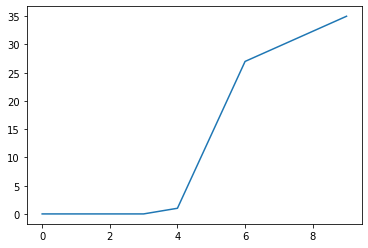

In [4]:
plt.plot(df["Instant_arrive"], df["Temps_attente"])

In [5]:
class EnvGrid:
    """
        docstring forEnvGrid.
    """
    def __init__(self, queue = df['Instant_arrive'], waiting = df['Temps_attente']):

        self.queue = queue
        self.waiting = waiting
        
        line = max(self.queue)
        column = max(self.waiting)
        temps_attente = [i for i in range(column)]
        mat = np.zeros((line, column))
        for i in range(len(self.queue)) :
            for j in range(len(temps_attente)) :
                if self.waiting[i] <= j+1 and self.waiting[i] >= j :
                    mat[i][j] = i+1 
                    break
                
        self.grid = mat      
        self.line = np.shape(self.grid)[0]-1
        self.column = np.shape(self.grid)[1]-1
        self.jump = 3
        self.cont = 0
        # Starting position
        self.y = 0
        self.x = 0

        self.actions = [
            [-self.jump, 0], # Up
            [self.jump, 0], #Down
            [0, -1], # Left
            [0, 1] # Right
        ]
        

    def reset(self):
        """
            Reset world
        """
        self.y = 0
        self.x = 0
        return ((self.y*self.column//self.jump)+self.x+1)

    def step(self, action):
        """
            Action: 0, 1, 2, 3
        """
        self.cont +=1
        if self.y + self.actions[action][0] >= self.jump and self.y + self.actions[action][0] <= self.line-self.jump :
            self.y = self.y + self.actions[action][0]
        #self.y = max(0, min(self.y + self.actions[action][0],self.line-self.jump))
        self.x = max(0, min(self.x + self.actions[action][1],self.column))
        list_r = [self.grid[i][self.x] for i in range(self.y, self.y+self.jump)]
        return ((self.y*self.column//self.jump)+self.x+1) , max(list_r)
    
    def new_reward(self, action) :
        stp, r = self.step(action)
        if r != 0 :
            self.grid[:,self.x] = 0
            

    def show(self):
        """
            Show the grid
        """
        print("---------------------")
        y = 0
        for line in self.grid:
            x = 0
            for pt in line:
                print("%s\t" % (pt if y != self.y or x != self.x else "X"), end="")
                x += 1
            y += 1
            print("")

    def is_finished(self):
        #if self.grid[self.y][self.x] == self.queue.iloc[-1] :
        if self.x == self.column or cont == self.column :
            return True


def take_action(st, Q, eps):
    # Take an action
    if random.uniform(0, 1) < eps:
        action = randint(0, 3)
    else: # Or greedy action
        #print(st)
        action = np.argmax(Q[st])
    return action

if __name__ == '__main__':
    env = EnvGrid()
    st = env.reset()
    print(env.grid)

    Q = np.zeros(((1+(env.line+1)//env.jump)*(env.column+1)+1,4))
    print(np.shape(Q))
    for _ in range(700):
        # Reset the game
        #print("next")
        #print('')
        cont = 0
        st = env.reset()
        while not env.is_finished():
            cont +=1
            env.show()
            #at = int(input("$>"))
            
            at = take_action(st, Q, 0.8)
            
            stp1, r = env.step(at)
            #print(cont)
            #print("s", stp1)
            #print("r", r)
            
            # Update Q function
            atp1 = take_action(stp1, Q, 0.0)
            Q[st][at] = Q[st][at] + 0.1*(r + 0.9*Q[stp1][atp1] - Q[st][at])
            #env.new_reward(at)
            st = stp1
            if r != 0 :
                env.grid[:,env.x] = 0
            
    for s in range(1, np.shape(Q)[0]):
        print(s, Q[s])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(141, 4)


KeyboardInterrupt: 